In [ ]:
!pip install pandas


In [ ]:
!pip install textblob
!python -m textblob.download_corpora

In [12]:
#Logistic regression & Linear regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt  
from textblob import TextBlob
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_percentage_error

#CLASSIFICATION

df = pd.read_csv("ReviewsDataset.csv")
custom_stop_words = ['the', 'is', 'in', 'and', 'to', 'of', 'a','an', 'it', 'this', 'that', 'for', 'with']

def preprocess_text(text):
    #Convert to lowercase
    text = str(text).lower()
    #remove special chars
    cleaned_text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text])
    #Remove stop words
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in custom_stop_words])
    return cleaned_text

df['cleaned_review'] = df['Summary'].apply(preprocess_text)
df['label'] = df['Sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})  

#print(df[['Summary', 'cleaned_review', 'label']].head())
x=df["cleaned_review"]
y=df["label"]
vectorizer = TfidfVectorizer(stop_words='english')
x_vec = vectorizer.fit_transform(x)

#TRAINING AND TESTING THE MODEL
x_train, x_test,y_train, y_test = train_test_split(x_vec, y,test_size=0.2,random_state=42)
clf = LogisticRegression(max_iter=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1=clf.predict(x_train)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#REGRESSION
def find_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
    
df['score'] = df['cleaned_review'].apply(find_score)
# Ranges from -1 (negative) to +1 (positive)
#print("Polarity Score:", df['score'].head())

X=df[['score']]
Y=df['Rate']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=140)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
print("MSE: ",mse)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
r2 = r2_score(y_train,y_pred)
print("R-squared: ",r2)
mape = mean_absolute_percentage_error(y_train, y_pred) * 100  
print("MAPE: ",mape)

#USER INPUT FOR REVIEW
text=input("Enter the review")
text1=preprocess_text(text)
review=vectorizer.transform([text1])
pred_value=clf.predict(review)
if pred_value==-1:
    sent="Negative"
else:
    sent="Positive"
    
s=find_score(text1)
rate=model.predict([[s]])
print("Review: ",text,"\nSentiment: ",sent,"\nPredicted rating: ",round(rate[0]))

Accuracy: 0.913899049012436
Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.70      0.76      5478
           0       0.76      0.41      0.53      2078
           1       0.93      0.98      0.95     33454

    accuracy                           0.91     41010
   macro avg       0.84      0.70      0.75     41010
weighted avg       0.91      0.91      0.91     41010

MSE:  0.9642129886668167
RMSE:  0.9819434752911272
R-squared:  0.43485896707463756
MAPE:  31.34597350440921


Enter the review very good product


Review:  very good product 
Sentiment:  Positive 
Predicted rating:  5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
#Logistic regression & polynomial regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from textblob import TextBlob

# Load data
df = pd.read_csv("ReviewsDataset.csv")

# Custom stop words list
custom_stop_words = ['the', 'is', 'in', 'and', 'to', 'of', 'a', 'an', 'it', 'this', 'that', 'for', 'with']

# Preprocess text function
# Preprocess text function
def preprocess_text(text):
    # Convert non-string values to empty strings
    if not isinstance(text, str):
        text = ""
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    cleaned_text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text])
    # Remove stop words
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in custom_stop_words])
    return cleaned_text

# Replace NaN values in 'Summary' with empty strings
df['Summary'].fillna("", inplace=True)

# Now apply find_score without issues
df['score'] = df['Summary'].apply(find_score)

# Apply preprocessing
df['cleaned_review'] = df['Summary'].apply(preprocess_text)

# Mapping sentiment to labels
df['label'] = df['Sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

# Vectorize text
x = df["cleaned_review"]
y = df["label"]
vectorizer = TfidfVectorizer(stop_words='english')
x_vec = vectorizer.fit_transform(x)

# Train-test split for classification
x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.2, random_state=42)

# Logistic Regression model
clf = LogisticRegression(max_iter=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

# Print classification metrics
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion MATRIX: \n",cm)

# Sentiment polarity score calculation function
def find_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment scoring on the original summary text
df['score'] = df['Summary'].apply(find_score)

# Prepare data for polynomial regression
X = df[['score']]
Y = df['Rate']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=140)

# Polynomial regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)

# Regression metrics
print("Regression Errors")
mse = mean_squared_error(y_train, y_pred_train)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_train, y_pred_train)
print("R-squared: ", r2)
mape = mean_absolute_percentage_error(y_train, y_pred_train) * 100
print("MAPE: ", mape)


# User input for review analysis
text = input("Enter the review: ")
text1 = preprocess_text(text)
review = vectorizer.transform([text1])
pred_value = clf.predict(review)

if pred_value == -1:
    sent = "Negative"
else:
    sent = "Positive"

# Predict rating based on sentiment score
s = find_score(text1)
s_poly = poly.transform([[s]])
rate = model.predict(s_poly)

print("Review: ", text, "\nSentiment: ", sent, "\nPredicted rating: ", round(rate[0], 2))




/var/folders/lq/8pt3966j1fs27lfntj0k2s_c0000gn/T/ipykernel_12750/466274878.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Summary'].fillna("", inplace=True)


Classification Accuracy: 0.913923433308949
Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.71      0.76      5478
           0       0.76      0.41      0.53      2078
           1       0.93      0.98      0.95     33454

    accuracy                           0.91     41010
   macro avg       0.84      0.70      0.75     41010
weighted avg       0.91      0.91      0.91     41010

Confusion MATRIX: 
 [[ 3862    92  1524]
 [  325   851   902]
 [  517   170 32767]]
Regression Errors
MSE:  0.9232214911613896
RMSE:  0.9608441555014995
R-squared:  0.45888475547788776
MAPE:  31.46927776677314


Enter the review:  good product


Review:  good product 
Sentiment:  Positive 
Predicted rating:  4.63


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [7]:

#test
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# CLASSIFICATION

df = pd.read_csv("ReviewsDataset.csv")
custom_stop_words = ['the', 'is', 'in', 'and', 'to', 'of', 'a', 'an', 'it', 'this', 'that', 'for', 'with']

def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove special chars
    cleaned_text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text])
    # Remove stop words
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in custom_stop_words])
    return cleaned_text

df['cleaned_review'] = df['Summary'].apply(preprocess_text)
df['label'] = df['Sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

x = df["cleaned_review"]
y = df["label"]
vectorizer = TfidfVectorizer(stop_words='english')
x_vec = vectorizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion MATRIX: \n",cm)


# REGRESSION
def find_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
df['score'] = df['cleaned_review'].apply(find_score)

X = df[['score']]
Y = df['Rate']

poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=140)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_train)

print("\nRegression Errors")
mse = mean_squared_error(y_train, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_train, y_pred)
print("R-squared: ", r2)
mape = mean_absolute_percentage_error(y_train, y_pred) * 100
print("MAPE: ", mape)

# USER INPUT FOR REVIEW
text = input("Enter the review")
text1 = preprocess_text(text)
review = vectorizer.transform([text1])
pred_value = clf.predict(review)
if pred_value == -1:
    sent = "Negative"
elif pred_value==1:
    sent = "Positive"
else:
    sent = "Neutral"
s = find_score(text1)
s_poly = poly.transform([[s]])
rate = model.predict(s_poly)
print("Review: ", text, "\nSentiment: ", sent, "\nPredicted rating: ", round(rate[0]))


Accuracy: 0.913899049012436
Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.70      0.76      5478
           0       0.76      0.41      0.53      2078
           1       0.93      0.98      0.95     33454

    accuracy                           0.91     41010
   macro avg       0.84      0.70      0.75     41010
weighted avg       0.91      0.91      0.91     41010

Confusion MATRIX: 
 [[ 3857    93  1528]
 [  324   851   903]
 [  514   169 32771]]

Regression Errors
MSE:  0.9193276291590791
RMSE:  0.9588157430701058
R-squared:  0.46116701180498554
MAPE:  31.389315805946733


Enter the review very good product


Review:  very good product 
Sentiment:  Positive 
Predicted rating:  5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [3]:
#test
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# CLASSIFICATION

df = pd.read_csv("ReviewsDataset.csv")
custom_stop_words = ['the', 'is', 'in', 'and', 'to', 'of', 'a', 'an', 'it', 'this', 'that', 'for', 'with']

def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove special chars
    cleaned_text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text])
    # Remove stop words
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in custom_stop_words])
    return cleaned_text

df['cleaned_review'] = df['Summary'].apply(preprocess_text)
df['label'] = df['Sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

x = df["cleaned_review"]
y = df["label"]
vectorizer = TfidfVectorizer(stop_words='english')
x_vec = vectorizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion MATRIX: \n", cm)


# REGRESSION

# Function to find sentiment polarity score
def find_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
df['score'] = df['cleaned_review'].apply(find_score)

X = df[['score']]
Y = df['Rate']

# Apply MinMaxScaler to the score feature
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X_scaled)

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=140)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_train)

print("\nRegression Errors")
mse = mean_squared_error(y_train, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_train, y_pred)
print("R-squared: ", r2)
mape = mean_absolute_percentage_error(y_train, y_pred) * 100
print("MAPE: ", mape)

# USER INPUT FOR REVIEW
text = input("Enter the review")
text1 = preprocess_text(text)
review = vectorizer.transform([text1])
pred_value = clf.predict(review)
if pred_value == -1:
    sent = "Negative"
elif pred_value == 1:
    sent = "Positive"
else:
    sent = "Neutral"

s = find_score(text1)
s_scaled = scaler.transform([[s]])  # Apply the same scaling to the new score
s_poly = poly.transform(s_scaled)
rate = model.predict(s_poly)
print("Review: ", text, "\nSentiment: ", sent, "\nPredicted rating: ", round(rate[0]))


Accuracy: 0.913899049012436
Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.70      0.76      5478
           0       0.76      0.41      0.53      2078
           1       0.93      0.98      0.95     33454

    accuracy                           0.91     41010
   macro avg       0.84      0.70      0.75     41010
weighted avg       0.91      0.91      0.91     41010

Confusion MATRIX: 
 [[ 3857    93  1528]
 [  324   851   903]
 [  514   169 32771]]

Regression Errors
MSE:  0.9193276291590793
RMSE:  0.9588157430701059
R-squared:  0.4611670118049854
MAPE:  31.38931580593506


Enter the review ok ok product


Review:  ok ok product 
Sentiment:  Neutral 
Predicted rating:  4


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Accuracy: 0.913899049012436
Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.70      0.76      5478
           0       0.76      0.41      0.53      2078
           1       0.93      0.98      0.95     33454

    accuracy                           0.91     41010
   macro avg       0.84      0.70      0.75     41010
weighted avg       0.91      0.91      0.91     41010

Confusion MATRIX: 
 [[ 3857    93  1528]
 [  324   851   903]
 [  514   169 32771]]

Regression Errors (Train Set)
MSE:  0.9193276291590793
RMSE:  0.9588157430701059
R-squared:  0.4611670118049854
MAPE:  31.38931580593506


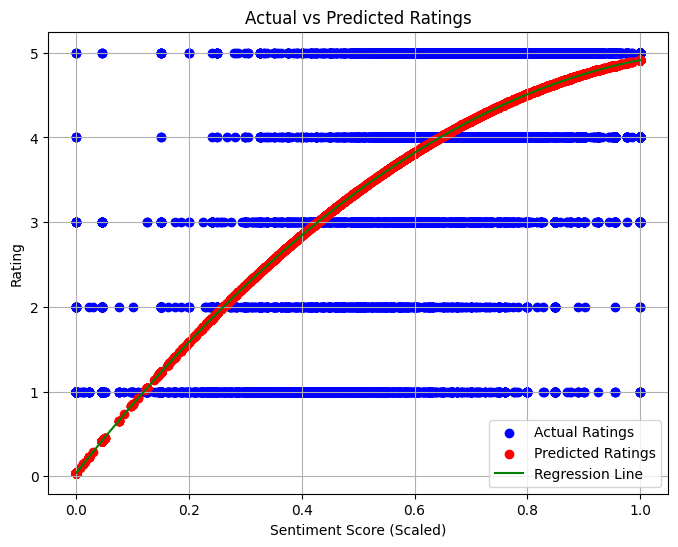

In [ ]:
#model with graph
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# CLASSIFICATION

df = pd.read_csv("ReviewsDataset.csv")
custom_stop_words = ['the', 'is', 'in', 'and', 'to', 'of', 'a', 'an', 'it', 'this', 'that', 'for', 'with']

def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove special chars
    cleaned_text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text])
    # Remove stop words
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in custom_stop_words])
    return cleaned_text

df['cleaned_review'] = df['Summary'].apply(preprocess_text)
df['label'] = df['Sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

x = df["cleaned_review"]
y = df["label"]
vectorizer = TfidfVectorizer(stop_words='english')
x_vec = vectorizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion MATRIX: \n", cm)


# REGRESSION

# Function to find sentiment polarity score
def find_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
df['score'] = df['cleaned_review'].apply(find_score)

X = df[['score']]
Y = df['Rate']

# Apply MinMaxScaler to the score feature
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X_scaled)

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=140)

model = LinearRegression()
model.fit(x_train, y_train)

# Predict on both train and test sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Regression Errors (on train set)
print("\nRegression Errors (Train Set)")
mse = mean_squared_error(y_train, y_train_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_train, y_train_pred)
print("R-squared: ", r2)
mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
print("MAPE: ", mape)

# PLOTTING REGRESSION RESULTS
plt.figure(figsize=(8, 6))

# Plot actual vs predicted ratings for the test set
plt.scatter(x_test[:, 1], y_test, color='blue', label='Actual Ratings')  # Using the scaled score feature
plt.scatter(x_test[:, 1], y_test_pred, color='red', label='Predicted Ratings')

# Add regression line
plt.plot(np.sort(x_test[:, 1]), np.sort(y_test_pred), color='green', label='Regression Line')

plt.title('Actual vs Predicted Ratings')
plt.xlabel('Sentiment Score (Scaled)')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

# USER INPUT FOR REVIEW
text = input("Enter the review")
text1 = preprocess_text(text)
review = vectorizer.transform([text1])
pred_value = clf.predict(review)
if pred_value == -1:
    sent = "Negative"
elif pred_value == 1:
    sent = "Positive"
else:
    sent = "Neutral"

s = find_score(text1)
s_scaled = scaler.transform([[s]])  # Apply the same scaling to the new score
s_poly = poly.transform(s_scaled)
rate = model.predict(s_poly)
print("Review: ", text, "\nSentiment: ", sent, "\nPredicted rating: ", round(rate[0]))


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from textblob import TextBlob

# Load dataset
df = pd.read_csv("ReviewsDataset.csv")

# Define custom stop words
custom_stop_words = ['the', 'is', 'in', 'and', 'to', 'of', 'a', 'an', 'it', 'this', 'that', 'for', 'with']

# Text preprocessing function
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    cleaned_text = ''.join([char if char.isalpha() or char.isspace() else ' ' for char in text])  # Remove special chars
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in custom_stop_words])  # Remove stop words
    return cleaned_text

df['cleaned_review'] = df['Summary'].apply(preprocess_text)
df['label'] = df['Sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

# Prepare data for classification
x = df["cleaned_review"]
y = df["label"]
vectorizer = TfidfVectorizer(stop_words='english')
x_vec = vectorizer.fit_transform(x)

# Train-test split for classification
x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.2, random_state=42)

# Logistic Regression Classifier
clf = LogisticRegression(max_iter=200)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Logistic Regression Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

# KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn_clf.fit(x_train, y_train)
y_knn_pred = knn_clf.predict(x_test)
print("KNN Classification Accuracy:", accuracy_score(y_test, y_knn_pred))
print("KNN Classification Report:\n", classification_report(y_test, y_knn_pred))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_knn_pred))

from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train, y_train)
y_dt_pred = dt_clf.predict(x_test)

# Decision Tree Classifier Metrics
print("Decision Tree Classification Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_dt_pred))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_dt_pred))

# Sentiment score function for regression
def find_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['score'] = df['cleaned_review'].apply(find_score)

# Prepare data for regression
X = df[['score']]
Y = df['Rate']
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(X, Y, test_size=0.2, random_state=140)

# Linear Regression Model
model = LinearRegression()
model.fit(x_train_reg, y_train_reg)
y_pred_reg = model.predict(x_train_reg)
mse = mean_squared_error(y_train_reg, y_pred_reg)
print("Linear Regression MSE:", mse)
print("Linear Regression RMSE:", np.sqrt(mse))
print("Linear Regression R-squared:", r2_score(y_train_reg, y_pred_reg))
print("Linear Regression MAPE:", mean_absolute_percentage_error(y_train_reg, y_pred_reg) * 100)

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
knn_reg.fit(x_train_reg, y_train_reg)
y_knn_train_pred = knn_reg.predict(x_train_reg)
knn_mse = mean_squared_error(y_train_reg, y_knn_train_pred)
print("KNN Regression MSE:", knn_mse)
print("KNN Regression RMSE:", np.sqrt(knn_mse))
print("KNN Regression R-squared:", r2_score(y_train_reg, y_knn_train_pred))
print("KNN Regression MAPE:", mean_absolute_percentage_error(y_train_reg, y_knn_train_pred) * 100)

# USER INPUT FOR REVIEW
text = input("Enter the review: ")
text1 = preprocess_text(text)
review = vectorizer.transform([text1])

# Logistic Regression Classification prediction
pred_value = clf.predict(review)
sent = "Negative" if pred_value == -1 else "Positive"

# KNN Classification prediction
pred_value_knn = knn_clf.predict(review)
sent_knn = "Negative" if pred_value_knn == -1 else "Positive"

# Sentiment score and rating prediction
s = find_score(text1)
rate = model.predict([[s]])
rate_knn = knn_reg.predict([[s]])

print("Review:", text)
print("Logistic Regression Sentiment:", sent)
print("Logistic Regression Predicted Rating:", round(rate[0]))
print("KNN Sentiment:", sent_knn)
print("KNN Predicted Rating:", round(rate_knn[0]))


Logistic Regression Classification Accuracy: 0.913899049012436
Logistic Regression Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.70      0.76      5478
           0       0.76      0.41      0.53      2078
           1       0.93      0.98      0.95     33454

    accuracy                           0.91     41010
   macro avg       0.84      0.70      0.75     41010
weighted avg       0.91      0.91      0.91     41010

KNN Classification Accuracy: 0.8676176542306755
KNN Classification Report:
               precision    recall  f1-score   support

          -1       0.73      0.51      0.60      5478
           0       0.43      0.45      0.44      2078
           1       0.91      0.95      0.93     33454

    accuracy                           0.87     41010
   macro avg       0.69      0.64      0.66     41010
weighted avg       0.86      0.87      0.86     41010

KNN Confusion Matrix:
 [[ 2794   360  2324]
 [  293   9

Enter the review:  good


Review: good
Logistic Regression Sentiment: Positive
Logistic Regression Predicted Rating: 5
KNN Sentiment: Positive
KNN Predicted Rating: 5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
